In [122]:
import pandas as pd
import numpy as np
import pickle
from tqdm import *
from scipy.stats import spearmanr
import statsmodels.api as sm
from scipy import stats

# 关闭通知
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from mpl_finance import candlestick_ochl

from kaki.kkdatac.crypto import get_pairs, get_price

# Crypto pairs list
pairs = get_pairs("kline-1D")

data = get_price(pairs, bar="1D",fields=['open','high','low','close','instId'])

100%|██████████| 493/493 [00:19<00:00, 24.97it/s]


In [124]:
# Date is ISO date
data['date'] = data['timestamp'].dt.date

In [125]:
data.drop(columns=['timestamp'],inplace=True)

In [126]:

data = data.set_index(["instId","date"])

In [128]:
from datetime import date

end = date.fromisoformat('2022-02-14')
start = end - pd.Timedelta(days=60)


In [129]:
start, end

(datetime.date(2021, 12, 16), datetime.date(2022, 2, 14))

In [130]:
stock_a = data.loc['BTC-USDT-SWAP'].loc[start:end].copy()
stock_a.index = date2num(stock_a.index)
stock_a.index.names = ['date']
quotes = stock_a[['open','close','high','low']].reset_index().set_index(['date','open','close','high','low']).index.tolist()


In [131]:
quotes

[(18977.0, 48593.1, 46500.0, 48723.7, 45407.1),
 (18978.0, 46505.7, 46857.9, 47449.9, 45487.7),
 (18979.0, 46857.8, 47249.0, 48385.8, 46321.0),
 (18980.0, 47247.6, 45983.6, 47569.9, 45561.0),
 (18981.0, 45983.5, 48419.0, 49300.0, 45876.4),
 (18982.0, 48419.0, 48893.6, 49600.0, 48335.4),
 (18983.0, 48893.6, 48803.5, 49269.3, 48035.7),
 (18984.0, 48804.6, 50955.7, 51500.0, 48676.2),
 (18985.0, 50955.7, 50671.4, 51845.6, 50501.1),
 (18986.0, 50675.8, 50043.8, 51166.4, 49382.2),
 (18987.0, 50048.3, 51437.1, 51680.0, 49914.4),
 (18988.0, 51439.6, 48955.8, 52099.4, 48200.0),
 (18989.0, 48942.4, 47947.4, 48980.0, 46567.8),
 (18990.0, 47947.4, 47182.3, 48040.5, 45888.0),
 (18991.0, 47182.3, 48021.8, 48578.0, 46714.0),
 (18992.0, 48021.8, 47211.7, 48130.1, 45656.1),
 (18993.0, 47211.7, 47343.1, 47947.0, 46777.0),
 (18994.0, 47344.2, 46697.3, 48003.6, 46568.9),
 (18995.0, 46697.3, 46932.8, 47521.0, 45681.0),
 (18996.0, 46932.9, 46621.3, 47088.9, 45510.0),
 (18997.0, 46621.8, 42944.7, 46673.8, 42

([<matplotlib.lines.Line2D at 0x325167bb0>,
  <matplotlib.patches.Rectangle at 0x3251db460>])

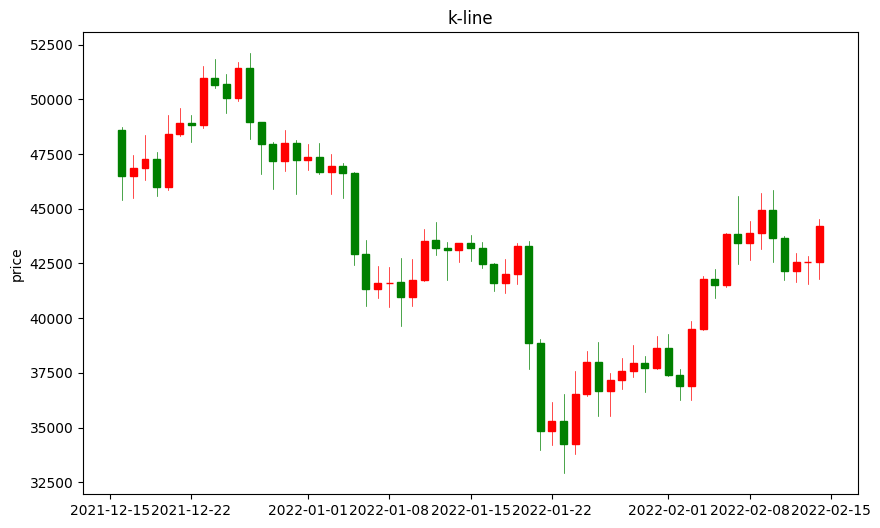

In [132]:
fig,ax = plt.subplots(figsize = (10,6),facecolor = 'white')
ax.xaxis_date()

plt.yticks()
plt.title('k-line')
plt.ylabel('price')

candlestick_ochl(ax,quotes,colorup = 'r',width = 0.6,colordown = 'g')

In [145]:
def get_previous_trading_date(end_date: str, n=1):
    end = date.fromisoformat(end_date)
    start = end - pd.Timedelta(days=60)
    return start, end
def k_line(data, instId, end_date, length=60):
    df = data.copy()
    start, end = get_previous_trading_date(end_date, length)
    logging.info(f"start: {start}, end: {end}")
    stock_a = df.loc[instId].loc[start:end].copy()
    stock_a.index = date2num(stock_a.index)
    stock_a.index.names = ['date']
    quotes = stock_a[['open','close','high','low']].reset_index().set_index(['date','open','close','high','low']).index.tolist()

    fig,ax = plt.subplots(figsize = (10,6),facecolor = 'white')
    ax.xaxis_date()

    plt.yticks()
    plt.title('k-line')
    plt.ylabel('price')

    candlestick_ochl(ax,quotes,colorup = 'r',width = 0.6,colordown = 'g')
    plt.show()

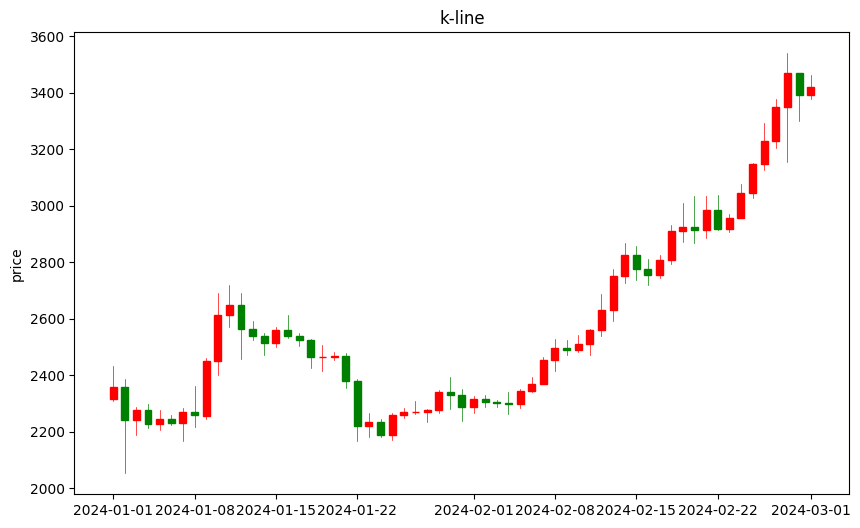

In [146]:
k_line(data,'ETH-USDT-SWAP',"2024-03-01")

In [147]:
stock_a = data.loc['ETH-USDT-SWAP']
stock_b = data.loc['BTC-USDT-SWAP']
T = stock_a.corrwith(stock_b).mean()
T

0.897566924327648

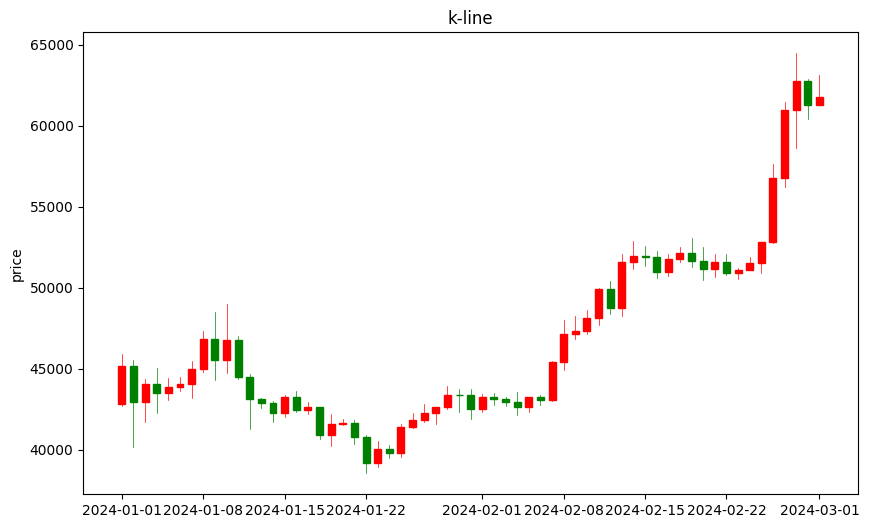

In [148]:
k_line(data,'BTC-USDT-SWAP',"2024-03-01")

In [152]:
data

open    high     low   close
instId        date                                      
1INCH-USDT    2020-12-24  2.0000  2.9620  1.5720  1.8850
              2020-12-25  1.8820  2.5700  1.5730  1.6420
              2020-12-26  1.6450  1.8000  1.1620  1.3570
              2020-12-27  1.3570  1.4420  1.0420  1.1690
              2020-12-28  1.1710  1.1710  0.7710  0.8000
...                          ...     ...     ...     ...
ZRX-USDT-SWAP 2024-03-06  0.4747  0.5751  0.4661  0.5126
              2024-03-07  0.5124  0.5484  0.4889  0.5203
              2024-03-08  0.5204  0.5809  0.5132  0.5666
              2024-03-09  0.5666  0.8159  0.5633  0.7788
              2024-03-10  0.7789  1.0867  0.7578  0.8629

[458314 rows x 4 columns]

In [151]:
dt = pd.DataFrame(columns=['stock','startdate','enddate','T'])
stock = 'XRP-USDT-SWAP'
end = '2022-07-01'
start = get_previous_trading_date(end,59)
df = data.copy()
stock_a = df.loc[stock].loc[start:end].copy()

stocklist = sorted(set(data.index.get_level_values(0)))
datelist = sorted(set(data.index.get_level_values(1)))

y = 0
for s in tqdm(stocklist):
    stock_b = data.loc[s]
    for d in datelist[60:-20:20]:
        end = d
        start = get_previous_trading_date(end,59)
        temp_k_line = stock_b.loc[start:end].reset_index().iloc[:,1:]
        T = stock_a.reset_index().iloc[:,1:].corrwith(temp_k_line).mean()
        dt.loc[y] = [s,start,end,T]

        y += 1

dt = dt.fillna(0)
dt = dt.sort_values(by='T',ascending=False)
dt

TypeError: '<' not supported between instances of 'datetime.date' and 'str'